In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/workspaces/EDA_5_alfonso/data/raw/diabetes.csv')

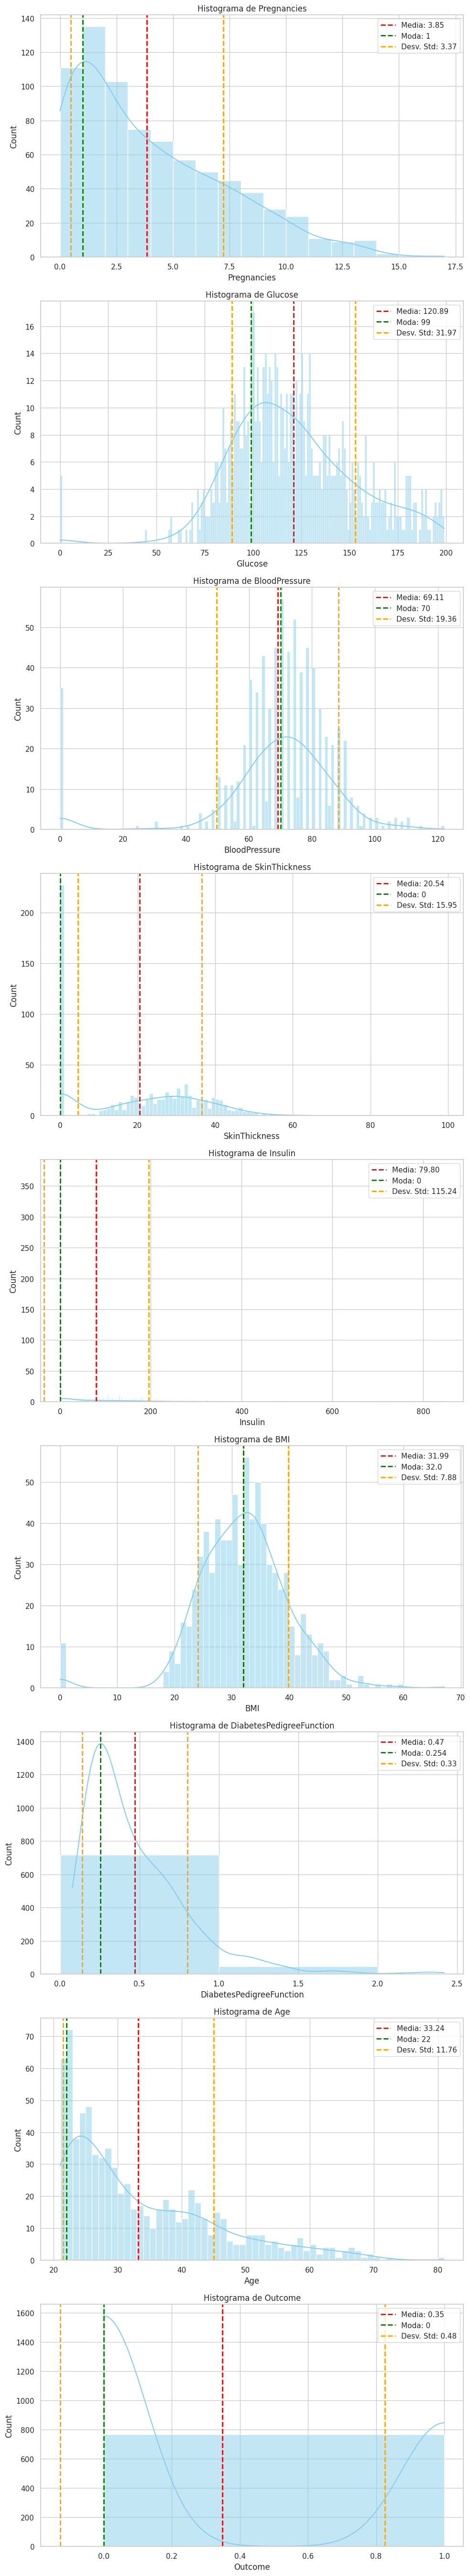

In [3]:
# Lista de nombres de columnas
columnas = df.columns

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear subgráficos para cada columna
fig, axes = plt.subplots(nrows=len(columnas), ncols=1, figsize=(10, 6 * len(columnas)))

# Iterar sobre cada columna
for i, col in enumerate(columnas):
    # Calcular la media, moda y desviación estándar
    media = df[col].mean()
    moda = df[col].mode() # Puede haber múltiples modas, tomamos la primera
    desviacion = df[col].std()

    # Convertir los valores de los bins a enteros
    bins = range(int(min(df[col])), int(max(df[col])) + 1)

    # Graficar el histograma
    sns.histplot(df[col], bins=bins, kde=True, color='skyblue', ax=axes[i])

    # Línea vertical para la media
    axes[i].axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')

    # Línea vertical para la moda
    axes[i].axvline(moda.iloc[0], color='green', linestyle='dashed', linewidth=2, label=f'Moda: {moda.iloc[0]}')

    # Líneas verticales para la desviación estándar
    axes[i].axvline(media + desviacion, color='orange', linestyle='dashed', linewidth=2, label=f'Desv. Std: {desviacion:.2f}')
    axes[i].axvline(media - desviacion, color='orange', linestyle='dashed', linewidth=2)

    axes[i].legend()
    axes[i].set_title(f'Histograma de {col}')

plt.tight_layout()
plt.show()